<a href="https://colab.research.google.com/github/duqrldudgns/deep_learning/blob/master/2_1_a_first_look_at_a_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import keras
keras.__version__

Using TensorFlow backend.


'2.3.1'

# 신경망과의 첫 만남

- 여기에서 풀려고 하는 문제는 흑백 손글씨 숫자 이미지(28x28 픽셀)를 10개의 범주(0에서 9까지)로 분류하는 것

## MNIST

- 머신 러닝 커뮤니티에서 고전으로 취급받는 데이터셋인 MNIST를 사용

- MNIST 문제를 알고리즘이 제대로 작동하는지 확인하기 위한 딥러닝계의 ‘Hello World’라고 생각해도 됨

- 
MNIST 데이터셋은 넘파이 배열 형태로 케라스에 이미 포함되어 있음

In [4]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


- train_images와 train_labels가 모델이 학습해야 할 훈련 세트를 구성 

- 모델은 test_images와 test_labels로 구성된 테스트 세트에서 테스트될 것

- 이미지는 넘파이 배열로 인코딩되어 있고 레이블은 0에서부터 9까지의 숫자 배열

- 이미지와 레이블은 일대일 관계를 가짐

## 훈련 데이터

- 훈련 세트에 60,000개의 이미지가 있다는 것을 보여줌
- 각 이미지는 28x28 픽셀로 표현

In [5]:
train_images.shape

(60000, 28, 28)

- 비슷하게 훈련 세트에는 60,000개의 레이블

In [6]:
len(train_labels)

60000

- 각 레이블은 0과 9사이의 정수

In [7]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

##  테스트 데이터

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
len(test_labels)

10000

In [10]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

### 다섯 번째 샘플을 맷플롯립 라이브러리를 사용해 확인

In [11]:
import matplotlib.pyplot as plt

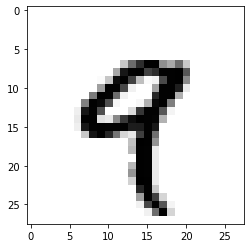

In [12]:
digit = train_images[4]

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()


### 작업 순서
- 먼저 훈련 데이터 train_images와 train_labels를 네트워크에 주입       
    - 네트워크는 이미지와 레이블을 연관시킬 수 있도록 학습됨 

- 마지막으로 test_images에 대한 예측을 네트워크에게 요청

- 이 예측이 test_labels와 맞는지 확인

### 신경망 만들기

In [13]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

신경망의 핵심 구성 요소는 일종의 데이터 처리 필터라고 생각할 수 있는 층입니다. 어떤 데이터가 들어가면 더 유용한 형태로 출력됩니다. 조금 더 구체적으로 층은 주어진 문제에 더 의미 있는 표현을 입력된 데이터로부터 추출합니다. 대부분의 딥러닝은 간단한 층을 연결하여 구성되어 있고, 점진적으로 데이터를 정제하는 형태를 띠고 있습니다. 딥러닝 모델은 데이터 정제 필터(층)가 연속되어 있는 데이터 프로세싱을 위한 여과기와 같습니다.

이 예에서는 조밀하게 연결된 (또는 완전 연결된) 신경망 층인 Dense 층 2개가 연속되어 있습니다. 두 번째 (즉, 마지막) 층은 10개의 확률 점수가 들어 있는 배열(모두 더하면 1입니다)을 반환하는 소프트맥스 층입니다. 각 점수는 현재 숫자 이미지가 10개의 숫자 클래스 중 하나에 속할 확률입니다.

신경망이 훈련 준비를 마치기 위해서 컴파일 단계에 포함될 세 가지가 더 필요합니다:

- 손실 함수 : 훈련 데이터에서 신경망의 성능을 측정하는 방법으로 네트워크가 옳은 방향으로 학습될 수 있도록 도와 줍니다.
- 옵티마이저: 입력된 데이터와 손실 함수를 기반으로 네트워크를 업데이트하는 메커니즘입니다.
- 훈련과 테스트 과정을 모니터링할 지표 : 여기에서는 정확도(정확히 분류된 이미지의 비율)만 고려하겠습니다.   

손실 함수와 옵티마이저의 정확한 목적은 이어지는 두 개의 장에서 자세히 설명하겠습니다.

In [14]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])


훈련을 시작하기 전에 데이터를 네트워크에 맞는 크기로 바꾸고 모든 값을 0과 1 사이로 스케일을 조정합니다. 예를 들어, 앞서 우리의 훈련 이미지는 [0, 255] 사이의 값인 uint8 타입의 (60000, 28, 28) 크기를 가진 배열로 저장되어 있습니다. 이 데이터를 0과 1 사이의 값을 가지는 float32 타입의 (60000, 28 * 28) 크기의 배열로 바꿉니다.

In [15]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

### 레이블을 범주형으로 인코딩

In [16]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

### 신경망을 훈련시킬 준비 완료
- 케라스에서는 fit 메서드를 호출하여 훈련 데이터에 모델을 학습 시킴

In [17]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 5s 79us/step - loss: 0.2570 - accuracy: 0.9254
Epoch 2/5
60000/60000 [==============================] - 4s 74us/step - loss: 0.1038 - accuracy: 0.9692
Epoch 3/5
60000/60000 [==============================] - 5s 88us/step - loss: 0.0679 - accuracy: 0.9798
Epoch 4/5
60000/60000 [==============================] - 5s 84us/step - loss: 0.0499 - accuracy: 0.9852
Epoch 5/5
60000/60000 [==============================] - 5s 76us/step - loss: 0.0369 - accuracy: 0.9890


훈련하는 동안 두 개의 정보가 출력됩니다. 훈련 데이터에 대한 네트워크의 손실과 정확도입니다.

훈련 데이터에 대해 0.989(98.9%)의 정확도를 금방 달성합니다. 이제 테스트 세트에서도 모델이 잘 작동하는지 확인해 보겠습니다

In [18]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 49us/step


In [19]:
print('test_acc:', test_acc)

test_acc: 0.9789000153541565


테스트 세트의 정확도는 97.8%로 나왔습니다. 훈련 세트 정확도보다는 약간 낮습니다. 훈련 정확도와 테스트 정확도 사이의 차이는 과대적합 때문입니다. 이는 머신 러닝 모델이 훈련 데이터보다 새로운 데이터에서 성능이 낮아지는 경향을 말합니다. 과대적합은 3장에서 자세하게 논의하겠습니다.